# Setup environment

In [1]:
!pip install -q gym
!pip install -q ale-py
!pip install -q Pygame
!pip install --upgrade opencv-contrib-python

     |████████████████████████████████| 1.7 MB 725 kB/s 
     |████████████████████████████████| 21.8 MB 5.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Get ROMs from here: http://www.atarimania.com/rom_collection_archive_atari_2600_roms.html
# More info:https://brosa.ca/blog/ale-release-v0.7

In [8]:
import os
os.mkdir('roms')
os.chdir('roms')
os.listdir()

[]

In [14]:
!gdown --id 1055Ah42P3nHfOv_xH6RRTtBKGfpdbuNQ --quiet
!unrar e Roms.rar   # when it shows [Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit  ------> just terminate the cell


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Roms.rar

Extracting  128 in 1 Game Select ROM (Unknown) ~.bin                       0%  OK 
Extracting  2 in 1 - Chess, Othello (Atari) (Prototype).bin                0%  OK 
Extracting  2 Pak Special - Cavern Blaster, City War (1992) (HES) (773-867) (PAL).bin       0%  OK 
Extracting  2 Pak Special - Challenge, Surfing (1990) (HES) (771-333) (PAL).bin       0%  OK 
Extracting  2 Pak Special - Dolphin, Oink (1990) (HES) (771-341) (PAL).bin       0%  OK 
Extracting  2 Pak Special - Dolphin, Pigs n' Wolf (1990) (HES) (771-341) (PAL).bin       0%  OK 
Extracting  2 Pak Special - Dungeon Master, Creature Strike (1992) (HES) (773-891) (PAL).bin       0%  OK 
Extracting  2 Pak Special - Hoppy, Alien Force (1992) (HES) (773-875) (PAL).bin       0%  OK 
Extracting  2 Pak Special - Moto-Cross, Boom Bang (1990) (HES) (701-157) (PAL).bin    

In [15]:
!ale-import-roms .

[SUPPORTED]             yars_revenge              Yars' Revenge.bin
[SUPPORTED]                 breakout Breakout - Breakaway IV (Paddle) (1978) (Atari, Brad Stewart - Sears) (CX2622 - 6-99813, 49-75107) ~.bin
[SUPPORTED]            crazy_climber Crazy Climber (1983) (Atari - Roklan, Joe Gaucher, Alex Leavens) (CX2683) ~.bin
[SUPPORTED]                ms_pacman                Ms. Pac-Man.bin
[SUPPORTED]                 surround Surround (32 in 1) (Bit Corporation) (R320).bin
[SUPPORTED]                 robotank Robot Tank (Robotank) (1983) (Activision, Alan Miller) (AZ-028, AG-028-04) ~.bin
[SUPPORTED]               mario_bros Mario Bros. (1983) (Atari, Dan Hitchens, Mimi Nyden) (CX2697) ~.bin
[SUPPORTED]                  othello Othello (1981) (Atari, Ed Logg, Carol Shaw - Sears) (CX2639 - 49-75162) [no grid markers] ~.bin
[SUPPORTED]           miniature_golf Miniature Golf - Arcade Golf.bin
[SUPPORTED]              donkey_kong Donkey Kong (1982) (Coleco - Woodside Design Associates -

In [16]:
os.chdir('..')

# Start

In [18]:
import os
import ale_py
import gym
from gym.utils.env_checker import check_env
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [19]:
import ale_py.roms as roms
print('Asteroids' in dir(roms))
print(dir(roms))

True
['Adventure', 'AirRaid', 'Alien', 'Amidar', 'Assault', 'Asterix', 'Asteroids', 'Atlantis', 'Atlantis2', 'Backgammon', 'BankHeist', 'BasicMath', 'BattleZone', 'BeamRider', 'Berzerk', 'Blackjack', 'Bowling', 'Boxing', 'Breakout', 'Carnival', 'Casino', 'Centipede', 'ChopperCommand', 'CrazyClimber', 'Crossbow', 'Darkchambers', 'Defender', 'DemonAttack', 'DonkeyKong', 'DoubleDunk', 'Earthworld', 'ElevatorAction', 'Enduro', 'Entombed', 'Et', 'FishingDerby', 'FlagCapture', 'Freeway', 'Frogger', 'Frostbite', 'Galaxian', 'Gopher', 'Gravitar', 'Hangman', 'HauntedHouse', 'Hero', 'HumanCannonball', 'IceHockey', 'Jamesbond', 'JourneyEscape', 'Kaboom', 'Kangaroo', 'KeystoneKapers', 'KingKong', 'Klax', 'Koolaid', 'Krull', 'KungFuMaster', 'LaserGates', 'LostLuggage', 'MarioBros', 'MiniatureGolf', 'MontezumaRevenge', 'MrDo', 'MsPacman', 'NameThisGame', 'Othello', 'Pacman', 'Phoenix', 'Pitfall', 'Pitfall2', 'Pong', 'Pooyan', 'PrivateEye', 'Qbert', 'Riverraid', 'RoadRunner', 'Robotank', 'Seaquest', 

In [ ]:
# import ale_py
# from ale_py import ALEInterface
# from ale_py.roms import Asteroids

# ale = ALEInterface()
# ale.loadROM(Asteroids)

In [34]:
env = gym.make("ALE/Asteroids-v5", render_mode='rgb_array', full_action_space=False, obs_type='rgb', difficulty=0, mode=0) # https://www.gymlibrary.dev/environments/atari/#common-arguments

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
observation, info = env.reset(seed=42)
# observation: game show
action = env.action_space.sample()
action
# https://www.gymlibrary.dev/environments/atari/asteroids/ Action meanings

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:191: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  "Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting."
/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:138: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'tuple'>
  f"{pre} was expecting a numpy array, actual type: {type(obs)}"
/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:226: UserWarning: WARN: Casting input x to numpy array.
  logger.warn("Casting input x to numpy array.")
/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:167: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space with exception: setting an array element 

4

In [ ]:
env.observation_space.sample().shape

(210, 160)

In [ ]:
out = env.step(action)
obs, score, done, status = out
obs, score, done, status

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 0.0,
 False,
 {'lives': 4, 'episode_frame_number': 20, 'frame_number': 20})

In [ ]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        #env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{} for action:{} n_state.shape:{}'.format(episode, score, action, n_state.shape))

Episode:1 Score:680.0 for action:11 n_state.shape:(210, 160, 3)
Episode:2 Score:280.0 for action:5 n_state.shape:(210, 160, 3)
Episode:3 Score:980.0 for action:11 n_state.shape:(210, 160, 3)
Episode:4 Score:2000.0 for action:0 n_state.shape:(210, 160, 3)
Episode:5 Score:1410.0 for action:5 n_state.shape:(210, 160, 3)
Episode:6 Score:1370.0 for action:12 n_state.shape:(210, 160, 3)
Episode:7 Score:1180.0 for action:10 n_state.shape:(210, 160, 3)
Episode:8 Score:980.0 for action:2 n_state.shape:(210, 160, 3)
Episode:9 Score:1300.0 for action:13 n_state.shape:(210, 160, 3)
Episode:10 Score:680.0 for action:0 n_state.shape:(210, 160, 3)


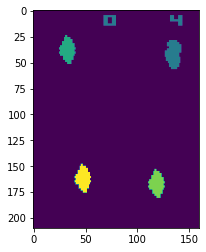

In [ ]:
plt.imshow(observation)

In [ ]:
os.mkdir('video')

In [ ]:
# out = cv2.VideoWriter('video/output1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 24, (210, 160), False)
out1 = cv2.VideoWriter('video/test28.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, (210, 160), False)
for _ in range(30):
    data = np.random.randint(0, 256, (210, 160, 1), dtype='uint8')
    out1.write(data)
out1.release()


In [ ]:
env.reset()
action = env.action_space.sample()
n_state, reward, done, info = env.step(action)
type(n_state), n_state.shape

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:191: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  "Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting."
/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:138: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'tuple'>
  f"{pre} was expecting a numpy array, actual type: {type(obs)}"
/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:226: UserWarning: WARN: Casting input x to numpy array.
  logger.warn("Casting input x to numpy array.")
/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:167: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space with exception: setting an array element 

(numpy.ndarray, (210, 160))

In [ ]:
for episode in range(1):
    state = env.reset()
    done = False
    score = 0 
    n_states = []

    while not done:
        #env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward

        n_states.append(n_state)
        # plt.imshow(n_state)
        # plt.show()
    print('Episode:{} Score:{} for action:{}'.format(episode, score, action))

In [ ]:
x = env.render()
x.shape

(210, 160, 3)

In [ ]:
env.action_space

Discrete(14)

In [ ]:
# Model output: env.action_space
# Another example: https://www.youtube.com/watch?v=bD6V3rcr_54 (src code; https://github.com/nicknochnack/OpenAI-Reinforcement-Learning-with-Custom-Environment)

In [46]:
state = env.reset()
done = False
score = 0 
n_states = []
while not done:
    #env.render()
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    score+=reward

    n_states.append(n_state)
    # plt.imshow(n_state)
    # plt.show()
print('Score:{} for action:{}'.format(score, action))

Score:980.0 for action:0


In [44]:
def create_vid(n_states, filename='my_data2.mp4'):
  fps = 5.0
  sec=2
  size = n_states[0].shape[1], n_states[0].shape[0]
  out = cv2.VideoWriter(filename, cv2.VideoWriter_fourcc(*'mp4v'), float(fps), size)

  for i in range(len(n_states)):#range(fps*sec):
    idx = i % len(n_states)
    # val = np.random.randint(0,255, (hieght, width, channel), dtype = np.uint8)  # must be 160, 210, 3 but not 210, 160, 3 ?????
    # state = np.transpose(n_states[idx], (1, 0, 2))
    out.write(n_states[idx])

  out.release()